In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


In [2]:
df = pd.read_csv("data/testdata_000000000000.csv", index_col="clusterid",dtype=np.uint32)
#df = pd.concat([pd.read_csv(f, index_col="clusterid",dtype=np.uint8) for f in glob.glob('data/testdata_000000000000.csv')])
#df = pd.DataFrame(np.random.randint(10e3, size=(10000,8)),dtype=np.uint16)

In [3]:
df.head()

,out_degree,in_degree,total_degree
clusterid,,,
20,38887182,23566625,62453807
121,11096220,19351778,30447998
991,15621598,14212803,29834401
803899,11724699,12809421,24534120
5658,1180037,15362480,16542517


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 7865296 entries, 20 to 7297909
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   out_degree    7865296 non-null  uint32
 1   in_degree     7865296 non-null  uint32
 2   total_degree  7865296 non-null  uint32
dtypes: uint32(3)
memory usage: 150.0 MB


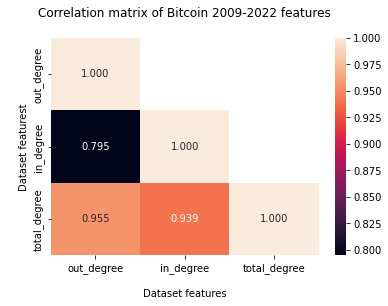

In [6]:
corr = df.corr().abs()

hm = sns.heatmap(corr, annot = True, fmt="0.3f",  mask = ~np.tril(np.ones(corr.shape)).astype(bool))

hm.set(xlabel='\nDataset features', ylabel='\nDataset featurest', title = "Correlation matrix of Bitcoin 2009-2022 features\n")

plt.show()

In [9]:
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Correlation >=0.8 can 'confuse the model' and were extracted
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
print(f"Removing strong correlated columns: {to_drop}")

df.drop(columns=to_drop, axis=1,inplace=True)

display(df.head())
display(df.info())

Removing strong correlated columns: []


,out_degree,in_degree
clusterid,,
20,38887182,23566625
121,11096220,19351778
991,15621598,14212803
803899,11724699,12809421
5658,1180037,15362480


<class 'pandas.core.frame.DataFrame'>
UInt64Index: 7865296 entries, 20 to 7297909
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   out_degree  uint32
 1   in_degree   uint32
dtypes: uint32(2)
memory usage: 120.0 MB


None

In [55]:
sample = df.sample(100,random_state=42)
sample

,out_degree,in_degree
clusterid,,
10339774,26,13
769791877,158,69
409500298,74,108
148128639,22,13
767868508,1,33
...,...,...
13709703,175,56
861536605,1,109
906386,334,136


In [63]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(min_samples=1).fit(sample)

In [64]:
labels = clustering.labels_
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

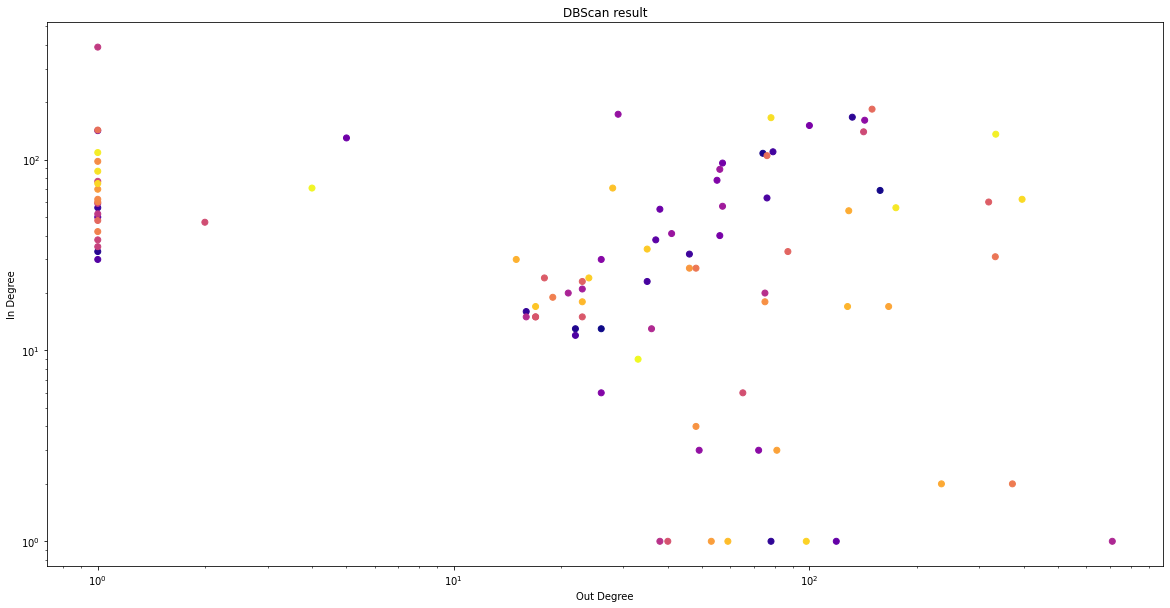

In [69]:
# Plot the clusters

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.scatter(sample.out_degree, sample.in_degree, c = labels, cmap= "plasma") # plotting the clusters

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlabel("Out Degree") # X-axis label
plt.ylabel("In Degree") # Y-axis label

ax.set_title("DBScan result")
plt.show() # showing the plot